In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from load_data import load_data

In [2]:
df = load_data()

In [ ]:
# Marketing wants to understand customer age patterns and their purchasing behavior
def groupAge(age):
    if age >= 18 and age <= 25:
        return '18-25'
    elif age >= 26 and age <= 35:
        return '26-35'
    elif age >= 36 and age <= 45:
        return '36-45'
    elif age >= 46 and age <= 55:
        return '46-55'
    elif age >= 56:
        return '56+'


df['age_groups'] = df['customer_age'].apply(groupAge)


In [4]:
age_group_performence = df.groupby('age_groups').agg(
    total_revenue=('final_amount', 'sum'),
    avg_order_value=('final_amount', 'mean'),
    unique_customers=('customer_id', 'count'),
    avg_quantity_per_order=('quantity', 'mean')
)

age_group_performence

,total_revenue,avg_order_value,unique_customers,avg_quantity_per_order
age_groups,,,,
18-25,46518.4275,316.451888,147,3.136054
26-35,69075.6360,318.320903,217,3.041475
36-45,62261.0930,322.596337,193,3.150259
46-55,57300.0220,303.174720,189,2.920635
56+,77217.1170,304.004398,254,2.980315


<Axes: xlabel='age_groups', ylabel='Count'>

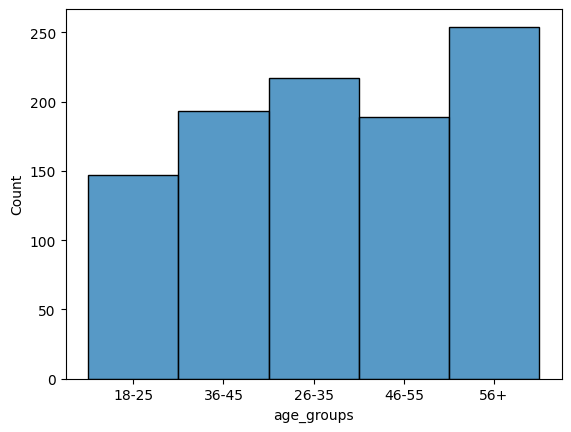

In [ ]:
# histogram showing age distribution
sns.histplot(data=df, x='age_groups')

<Axes: xlabel='age_groups', ylabel='total_revenue'>

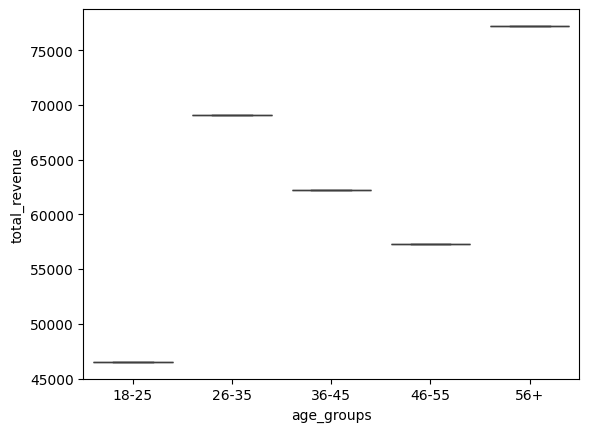

In [ ]:
# box plot showing order value distribution by age group
sns.boxplot(data=age_group_performence, x=age_group_performence.index, y=age_group_performence.total_revenue)

In [ ]:
# Identify the most valuable age group by total revenue
most_valuable_age_group = age_group_performence.sort_values(by='total_revenue', ascending=False).head(1)
most_valuable_age_group

,total_revenue,avg_order_value,unique_customers,avg_quantity_per_order
age_groups,,,,
56+,77217.117,304.004398,254,2.980315


In [ ]:
# Find the average customer age across all orders
average_customer_age= df['customer_age'].mean()
average_customer_age

np.float64(43.167)